## Logistic regression practical implementation


In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.datasets import make_classification

In [29]:
## creating the dataset
X,y=make_classification(n_samples=1000,n_features=10,n_classes=2,random_state=15)

In [30]:
X


array([[-0.3779567 ,  1.04389498,  1.04349443, ..., -0.0671922 ,
         0.17547148, -1.04964564],
       [-0.32525851,  1.27626282, -0.68612327, ...,  1.00663329,
        -0.83369182,  0.95774417],
       [ 0.73901891, -0.60090284, -0.17729436, ..., -0.21898072,
         0.87864296, -1.25774001],
       ...,
       [ 0.67556288, -0.53841971, -1.29950008, ...,  2.04333597,
         0.94738793,  0.79035376],
       [ 2.62971021, -2.45289885, -1.35978523, ...,  0.37889809,
        -1.97189411, -0.2522504 ],
       [-1.79149103, -0.12190773,  0.53515332, ..., -1.94135733,
         0.58900166, -1.00748218]], shape=(1000, 10))

In [31]:
X=pd.DataFrame(X)

In [32]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test =train_test_split(X,y,test_size=0.30,random_state=42)

In [33]:
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression()

In [34]:
logistic.fit(X_train,y_train)

LogisticRegression()

In [35]:
y_pred =logistic.predict(X_test)
print(y_pred)

[0 0 0 1 1 0 0 1 1 1 1 0 1 0 1 0 0 1 0 1 1 1 1 0 0 0 0 0 0 1 1 0 1 1 1 0 1
 1 0 0 0 0 0 1 0 1 1 1 1 0 1 1 1 1 1 1 1 0 1 0 1 0 0 0 1 1 0 0 1 0 0 0 1 0
 1 0 1 0 0 0 0 0 0 0 1 0 1 0 0 1 1 1 0 1 1 1 0 1 1 1 1 0 0 0 0 0 1 0 0 0 1
 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 1 1 0 0 1 1 1 1 0 0 0 1 1
 0 1 0 0 1 0 0 0 1 1 0 1 0 0 0 1 0 1 1 0 0 1 0 1 1 0 1 1 0 0 1 1 0 1 0 1 0
 0 1 1 0 1 1 1 1 0 1 1 1 1 1 0 1 1 0 1 0 0 1 0 1 0 1 1 0 1 0 1 0 0 0 0 0 0
 0 1 0 0 0 0 0 1 0 1 0 0 1 0 1 1 0 0 1 1 1 0 1 1 0 0 1 1 0 1 1 0 0 1 0 0 1
 0 0 1 0 1 0 1 0 0 1 1 0 0 1 1 0 1 1 1 0 1 1 0 0 0 1 0 0 0 1 0 0 1 0 1 0 1
 0 1 0 0]


In [36]:
logistic.predict_proba(X_test)

array([[9.33115111e-01, 6.68848891e-02],
       [6.60305264e-01, 3.39694736e-01],
       [8.65366570e-01, 1.34633430e-01],
       [9.60311284e-02, 9.03968872e-01],
       [2.43186448e-01, 7.56813552e-01],
       [5.76341649e-01, 4.23658351e-01],
       [8.25099409e-01, 1.74900591e-01],
       [2.30396936e-04, 9.99769603e-01],
       [1.25509886e-02, 9.87449011e-01],
       [2.73700749e-03, 9.97262993e-01],
       [7.07020509e-03, 9.92929795e-01],
       [5.68080321e-01, 4.31919679e-01],
       [8.39012147e-02, 9.16098785e-01],
       [9.73831278e-01, 2.61687218e-02],
       [1.27555917e-02, 9.87244408e-01],
       [8.06171769e-01, 1.93828231e-01],
       [9.95120127e-01, 4.87987316e-03],
       [1.78752959e-02, 9.82124704e-01],
       [9.78694999e-01, 2.13050006e-02],
       [3.90586932e-02, 9.60941307e-01],
       [3.39280977e-02, 9.66071902e-01],
       [3.13931361e-02, 9.68606864e-01],
       [5.01016525e-02, 9.49898348e-01],
       [8.18498841e-01, 1.81501159e-01],
       [8.589143

In [37]:
## performance matrix
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [38]:
score = accuracy_score(y_test,y_pred)
print(score)
cm = confusion_matrix(y_test,y_pred)
print(cm)
cl = classification_report(y_test,y_pred)
print(cl)

0.9166666666666666
[[146  11]
 [ 14 129]]
              precision    recall  f1-score   support

           0       0.91      0.93      0.92       157
           1       0.92      0.90      0.91       143

    accuracy                           0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300



In [39]:
## hpyer parameter tuning and cross validation
from sklearn.linear_model import LogisticRegressionCV
model = LogisticRegression()
penalty =['l1','l2','elasticnet']
c_values =[100,10,1.0,0.1,0.01]
solver = ['newton-cg','lbfgs','liblinear','sag','saga']

In [40]:
params=dict(penalty=penalty,C=c_values,solver=solver)

In [41]:
## Grid Search CV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
cv = StratifiedKFold()
grid = GridSearchCV(estimator=model,param_grid=params,scoring='accuracy',cv=cv,n_jobs=-1)

In [42]:
grid

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')

In [43]:
grid.fit(X_train,y_train)

d:\DataScienceBootCamp\python\venv\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
200 fits failed out of a total of 375.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "d:\DataScienceBootCamp\python\venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "d:\DataScienceBootCamp\python\venv\Lib\site-packages\sklearn\base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "d:\DataScienceBootCamp\python\venv\Lib\site-packages\sklearn\linear_model\_logi

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')

In [44]:
grid.best_params_

{'C': 0.01, 'penalty': 'l1', 'solver': 'saga'}

In [45]:
grid.best_score_

np.float64(0.9242857142857142)

In [46]:
y_pred=grid.predict(X_test)

In [47]:
score = accuracy_score(y_test,y_pred)
print(score)
cm = confusion_matrix(y_test,y_pred)
print(cm)
cl = classification_report(y_test,y_pred)
print(cl)

0.92
[[149   8]
 [ 16 127]]
              precision    recall  f1-score   support

           0       0.90      0.95      0.93       157
           1       0.94      0.89      0.91       143

    accuracy                           0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300



## Randomized Search CV

In [48]:
from sklearn.model_selection import RandomizedSearchCV

In [49]:
RandomCv= RandomizedSearchCV(estimator=model ,param_distributions=params,cv=5,scoring='accuracy')

In [52]:
RandomCv.fit(X_train,y_train)


d:\DataScienceBootCamp\python\venv\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
25 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "d:\DataScienceBootCamp\python\venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "d:\DataScienceBootCamp\python\venv\Lib\site-packages\sklearn\base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "d:\DataScienceBootCamp\python\venv\Lib\site-packages\sklearn\linear_model\_logisti

RandomizedSearchCV(cv=5, estimator=LogisticRegression(),
                   param_distributions={'C': [100, 10, 1.0, 0.1, 0.01],
                                        'penalty': ['l1', 'l2', 'elasticnet'],
                                        'solver': ['newton-cg', 'lbfgs',
                                                   'liblinear', 'sag',
                                                   'saga']},
                   scoring='accuracy')

In [53]:
RandomCv.best_params_

{'solver': 'liblinear', 'penalty': 'l2', 'C': 0.01}

In [54]:
y_pred = RandomCv.predict(X_test)

In [55]:
score = accuracy_score(y_test,y_pred)
print(score)
cm = confusion_matrix(y_test,y_pred)
print(cm)
cl = classification_report(y_test,y_pred)
print(cl)

0.9233333333333333
[[150   7]
 [ 16 127]]
              precision    recall  f1-score   support

           0       0.90      0.96      0.93       157
           1       0.95      0.89      0.92       143

    accuracy                           0.92       300
   macro avg       0.93      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300



## MultiClass Classification

In [60]:
X,y=make_classification(n_samples=1000,n_features=10,n_informative=3,n_classes=3,random_state=15)

In [61]:
X= pd.DataFrame(X)

In [62]:
y


array([2, 0, 0, 0, 1, 0, 1, 0, 2, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 2,
       2, 1, 1, 0, 2, 0, 2, 1, 2, 1, 2, 2, 0, 1, 2, 1, 1, 2, 1, 1, 2, 2,
       0, 2, 1, 0, 2, 0, 0, 1, 0, 1, 1, 0, 2, 2, 0, 1, 1, 2, 0, 0, 1, 0,
       0, 1, 2, 2, 0, 1, 2, 2, 1, 2, 0, 2, 0, 0, 1, 0, 2, 0, 2, 0, 0, 2,
       1, 2, 0, 0, 2, 0, 1, 0, 2, 0, 2, 1, 0, 0, 2, 2, 0, 2, 2, 0, 1, 0,
       1, 0, 1, 2, 1, 1, 1, 2, 0, 2, 0, 2, 1, 1, 0, 0, 1, 1, 2, 2, 1, 2,
       0, 1, 2, 2, 0, 2, 2, 0, 0, 1, 0, 2, 0, 1, 2, 0, 2, 1, 1, 0, 2, 1,
       0, 2, 2, 2, 2, 2, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       2, 2, 1, 2, 2, 2, 2, 0, 1, 0, 1, 0, 2, 2, 2, 1, 1, 0, 0, 0, 2, 0,
       0, 0, 1, 0, 2, 1, 0, 2, 2, 1, 1, 1, 1, 2, 0, 1, 2, 2, 1, 1, 0, 2,
       2, 1, 0, 2, 2, 1, 0, 1, 2, 0, 2, 1, 0, 0, 1, 2, 0, 0, 0, 0, 2, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 2, 2, 1, 0, 1, 1, 2, 2, 2, 2, 0, 1, 0,
       0, 2, 2, 1, 2, 0, 0, 1, 1, 2, 2, 1, 0, 0, 1, 0, 1, 2, 1, 0, 1, 0,
       2, 0, 1, 0, 0, 2, 2, 1, 0, 2, 0, 1, 2, 2, 2,

In [63]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test =train_test_split(X,y,test_size=0.30,random_state=42)

In [66]:
from sklearn.linear_model import LogisticRegression
logistic =LogisticRegression(multi_class='ovr')
logistic.fit(X_train,y_train)
y_pred =logistic.predict(X_test)

d:\DataScienceBootCamp\python\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


In [67]:
y_pred

array([2, 1, 2, 1, 1, 0, 0, 0, 2, 0, 2, 1, 2, 2, 2, 2, 2, 0, 0, 2, 2, 1,
       1, 1, 1, 0, 0, 0, 2, 1, 0, 2, 2, 1, 2, 0, 0, 2, 2, 1, 2, 2, 2, 1,
       2, 0, 1, 2, 0, 1, 0, 0, 0, 1, 1, 2, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       2, 1, 0, 1, 0, 1, 2, 1, 2, 2, 1, 0, 1, 0, 1, 0, 1, 2, 2, 0, 1, 2,
       2, 1, 1, 2, 2, 0, 0, 0, 2, 2, 0, 1, 2, 1, 2, 1, 0, 2, 0, 2, 0, 1,
       2, 1, 2, 2, 1, 1, 1, 1, 2, 0, 2, 0, 1, 2, 0, 0, 2, 2, 2, 1, 2, 0,
       2, 2, 0, 0, 0, 2, 0, 2, 0, 1, 2, 1, 1, 2, 0, 0, 1, 1, 2, 2, 2, 1,
       2, 0, 2, 2, 2, 1, 0, 2, 0, 0, 2, 0, 2, 0, 0, 1, 2, 0, 1, 1, 1, 1,
       0, 2, 1, 0, 0, 1, 2, 2, 2, 2, 2, 0, 1, 1, 2, 2, 1, 2, 2, 2, 2, 1,
       0, 0, 1, 2, 2, 0, 0, 2, 1, 2, 1, 0, 0, 2, 1, 1, 1, 2, 2, 1, 2, 1,
       0, 1, 0, 0, 1, 0, 2, 1, 0, 2, 2, 1, 1, 1, 2, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 1, 2, 2, 2, 1, 0, 0, 1, 0, 2,
       1, 2, 0, 0, 0, 2, 2, 1, 2, 0, 1, 1, 0, 0, 0, 1, 0, 2, 2, 0, 2, 0,
       0, 0, 1, 1, 2, 0, 1, 2, 2, 0, 1, 2, 0, 2])

In [68]:
score = accuracy_score(y_test,y_pred)
print(score)
cm = confusion_matrix(y_test,y_pred)
print(cm)
cl = classification_report(y_test,y_pred)
print(cl)

0.79
[[84 10  8]
 [ 3 74 25]
 [10  7 79]]
              precision    recall  f1-score   support

           0       0.87      0.82      0.84       102
           1       0.81      0.73      0.77       102
           2       0.71      0.82      0.76        96

    accuracy                           0.79       300
   macro avg       0.79      0.79      0.79       300
weighted avg       0.80      0.79      0.79       300



In [76]:
RandomCv= RandomizedSearchCV(estimator=logistic ,param_distributions=params,cv=5,scoring='accuracy')
RandomCv.fit(X_train,y_train)


d:\DataScienceBootCamp\python\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
d:\DataScienceBootCamp\python\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
d:\DataScienceBootCamp\python\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
d:\DataScienceBootCamp\python\venv\Lib\site-packages\sklearn\linear_model\_logi

RandomizedSearchCV(cv=5, estimator=LogisticRegression(multi_class='ovr'),
                   param_distributions={'C': [100, 10, 1.0, 0.1, 0.01],
                                        'penalty': ['l1', 'l2', 'elasticnet'],
                                        'solver': ['newton-cg', 'lbfgs',
                                                   'liblinear', 'sag',
                                                   'saga']},
                   scoring='accuracy')

In [77]:
RandomCv.best_params_

{'solver': 'saga', 'penalty': 'l2', 'C': 10}

In [78]:
y_pred = RandomCv.predict(X_test)

In [79]:
score = accuracy_score(y_test,y_pred)
print(score)
cm = confusion_matrix(y_test,y_pred)
print(cm)
cl = classification_report(y_test,y_pred)
print(cl)

0.79
[[84 10  8]
 [ 3 74 25]
 [10  7 79]]
              precision    recall  f1-score   support

           0       0.87      0.82      0.84       102
           1       0.81      0.73      0.77       102
           2       0.71      0.82      0.76        96

    accuracy                           0.79       300
   macro avg       0.79      0.79      0.79       300
weighted avg       0.80      0.79      0.79       300



In [80]:
grid = GridSearchCV(estimator=logistic,param_grid=params,scoring='accuracy',cv=cv,n_jobs=-1)
grid.fit(X_train,y_train)
y_pred = grid.predict(X_test)


d:\DataScienceBootCamp\python\venv\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
200 fits failed out of a total of 375.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "d:\DataScienceBootCamp\python\venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "d:\DataScienceBootCamp\python\venv\Lib\site-packages\sklearn\base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "d:\DataScienceBootCamp\python\venv\Lib\site-packages\sklearn\linear_model\_logi

In [81]:
grid.best_params_

{'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}

In [82]:
score = accuracy_score(y_test,y_pred)
print(score)
cm = confusion_matrix(y_test,y_pred)
print(cm)
cl = classification_report(y_test,y_pred)
print(cl)

0.7766666666666666
[[83 11  8]
 [ 4 72 26]
 [ 7 11 78]]
              precision    recall  f1-score   support

           0       0.88      0.81      0.85       102
           1       0.77      0.71      0.73       102
           2       0.70      0.81      0.75        96

    accuracy                           0.78       300
   macro avg       0.78      0.78      0.78       300
weighted avg       0.78      0.78      0.78       300



## Logidtic Regression for imbalanced DataSet

In [83]:
## generate and plot a synthetic imbalanced classification dataset
from collections import Counter
from sklearn.datasets import make_classification

In [84]:
X,y=make_classification(n_samples=10000,n_features=2,n_clusters_per_class=1,n_redundant=0,weights=[0.99],random_state=10)

In [87]:
X = pd.DataFrame(X)

In [88]:
y

array([0, 0, 0, ..., 0, 0, 0], shape=(10000,))

In [89]:
Counter(y)

Counter({np.int64(0): 9846, np.int64(1): 154})

<Axes: xlabel='0', ylabel='1'>

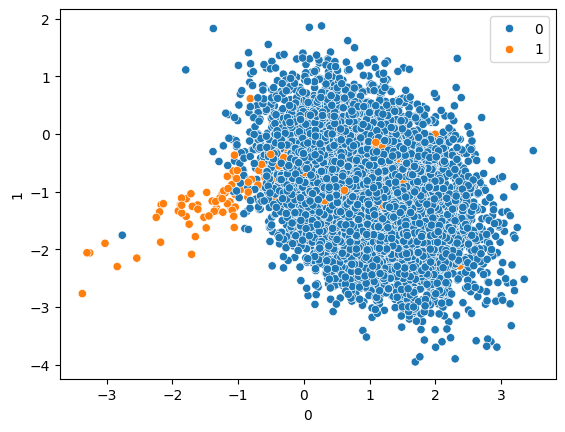

In [94]:
sns.scatterplot(x=X[0],y=X[1],hue=y)

In [95]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test =train_test_split(X,y,test_size=0.25,random_state=42)

In [96]:
## hpyer parameter tuning and cross validation
from sklearn.linear_model import LogisticRegressionCV
model = LogisticRegression()
penalty =['l1','l2','elasticnet']
c_values =[100,10,1.0,0.1,0.01]
solver = ['newton-cg','lbfgs','liblinear','sag','saga']
class_weight=[{0:w,1:y} for w in [1,10,50,100] for y in [1,10,50,100]]

In [97]:
params = dict(penalty=penalty,C=c_values,solver=solver,class_weight=class_weight)

In [98]:
params

{'penalty': ['l1', 'l2', 'elasticnet'],
 'C': [100, 10, 1.0, 0.1, 0.01],
 'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
 'class_weight': [{0: 1, 1: 1},
  {0: 1, 1: 10},
  {0: 1, 1: 50},
  {0: 1, 1: 100},
  {0: 10, 1: 1},
  {0: 10, 1: 10},
  {0: 10, 1: 50},
  {0: 10, 1: 100},
  {0: 50, 1: 1},
  {0: 50, 1: 10},
  {0: 50, 1: 50},
  {0: 50, 1: 100},
  {0: 100, 1: 1},
  {0: 100, 1: 10},
  {0: 100, 1: 50},
  {0: 100, 1: 100}]}

In [99]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
cv = StratifiedKFold()
grid = GridSearchCV(estimator=model,param_grid=params,scoring='accuracy',cv=cv,n_jobs=-1)

In [100]:
grid.fit(X_test,y_test)

d:\DataScienceBootCamp\python\venv\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
3200 fits failed out of a total of 6000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
400 fits failed with the following error:
Traceback (most recent call last):
  File "d:\DataScienceBootCamp\python\venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "d:\DataScienceBootCamp\python\venv\Lib\site-packages\sklearn\base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "d:\DataScienceBootCamp\python\venv\Lib\site-packages\sklearn\linear_model\_l

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01],
                         'class_weight': [{0: 1, 1: 1}, {0: 1, 1: 10},
                                          {0: 1, 1: 50}, {0: 1, 1: 100},
                                          {0: 10, 1: 1}, {0: 10, 1: 10},
                                          {0: 10, 1: 50}, {0: 10, 1: 100},
                                          {0: 50, 1: 1}, {0: 50, 1: 10},
                                          {0: 50, 1: 50}, {0: 50, 1: 100},
                                          {0: 100, 1: 1}, {0: 100, 1: 10},
                                          {0: 100, 1: 50}, {0: 100, 1: 100}],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')

In [101]:
y_pred =grid.predict(X_test)

In [102]:
grid.best_params_

{'C': 0.1, 'class_weight': {0: 50, 1: 50}, 'penalty': 'l2', 'solver': 'sag'}

In [103]:
score = accuracy_score(y_test,y_pred)
print(score)
cm = confusion_matrix(y_test,y_pred)
print(cm)
cl = classification_report(y_test,y_pred)
print(cl)

0.9892
[[2460    5]
 [  22   13]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2465
           1       0.72      0.37      0.49        35

    accuracy                           0.99      2500
   macro avg       0.86      0.68      0.74      2500
weighted avg       0.99      0.99      0.99      2500



## Logistic Regression with ROC curve and ROC AUC score


In [104]:
from sklearn.metrics import roc_curve ,roc_auc_score

In [105]:
X,y = make_classification(n_samples=1000,n_classes=2,random_state=1)

In [106]:
X_train,X_test,y_train,y_test =train_test_split(X,y,test_size=0.25,random_state=1)

In [107]:
# generate a no skill prediction (majority class)
dummy_model_prob = [0 for _ in range(len(y_test))]
dummy_model_prob

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [108]:
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [109]:
## prediction based on probablilty 
model_prob = model.predict_proba(X_test)


In [110]:
model_prob

array([[9.59354198e-01, 4.06458016e-02],
       [3.55102587e-01, 6.44897413e-01],
       [4.61036991e-01, 5.38963009e-01],
       [1.26765534e-01, 8.73234466e-01],
       [3.98492560e-01, 6.01507440e-01],
       [5.89004681e-01, 4.10995319e-01],
       [7.11999710e-02, 9.28800029e-01],
       [7.50321930e-01, 2.49678070e-01],
       [9.54385644e-01, 4.56143559e-02],
       [9.69602884e-01, 3.03971159e-02],
       [1.33956156e-01, 8.66043844e-01],
       [5.31819848e-01, 4.68180152e-01],
       [1.72347404e-01, 8.27652596e-01],
       [9.67809354e-01, 3.21906457e-02],
       [2.30046680e-01, 7.69953320e-01],
       [6.14802703e-01, 3.85197297e-01],
       [5.64943790e-01, 4.35056210e-01],
       [9.92521843e-01, 7.47815672e-03],
       [6.25866400e-01, 3.74133600e-01],
       [9.86718726e-01, 1.32812744e-02],
       [9.84853282e-01, 1.51467175e-02],
       [4.15877937e-02, 9.58412206e-01],
       [8.20879654e-01, 1.79120346e-01],
       [2.69178122e-02, 9.73082188e-01],
       [2.755166

In [111]:
## lets focus on the positive outcome
model_prob = model_prob[:,1]

In [113]:
## lets calculate the scores 
dummy_model_auc = roc_auc_score(y_test,dummy_model_prob)
model_auc = roc_auc_score(y_test,model_prob)
print(dummy_model_auc)
print(model_auc)

0.5
0.9232456140350878


In [114]:
## calculate ROC Curves
dummy_fpr, dummy_tpr, _ = roc_curve(y_test, dummy_model_prob)
model_fpr, model_tpr, thresholds = roc_curve(y_test, model_prob)

In [115]:
model_fpr

array([0.        , 0.        , 0.        , 0.00877193, 0.00877193,
       0.01754386, 0.01754386, 0.02631579, 0.02631579, 0.03508772,
       0.03508772, 0.04385965, 0.04385965, 0.05263158, 0.05263158,
       0.06140351, 0.06140351, 0.07017544, 0.07017544, 0.09649123,
       0.09649123, 0.11403509, 0.11403509, 0.12280702, 0.12280702,
       0.13157895, 0.13157895, 0.14912281, 0.14912281, 0.15789474,
       0.15789474, 0.16666667, 0.16666667, 0.1754386 , 0.1754386 ,
       0.18421053, 0.18421053, 0.21929825, 0.21929825, 0.27192982,
       0.27192982, 0.28070175, 0.28070175, 0.31578947, 0.31578947,
       0.3245614 , 0.3245614 , 0.40350877, 0.40350877, 0.44736842,
       0.44736842, 0.48245614, 0.48245614, 0.54385965, 0.54385965,
       0.9122807 , 0.9122807 , 1.        ])

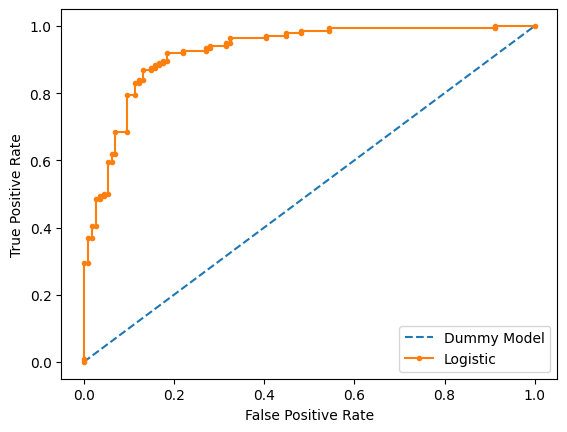

In [117]:
# plot the roc curve for the model
plt.plot(dummy_fpr, dummy_tpr, linestyle='--', label='Dummy Model')
plt.plot(model_fpr, model_tpr, marker='.', label='Logistic')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

C:\Users\aryan\AppData\Local\Temp\ipykernel_21032\1041434970.py:15: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  pyplot.legend()


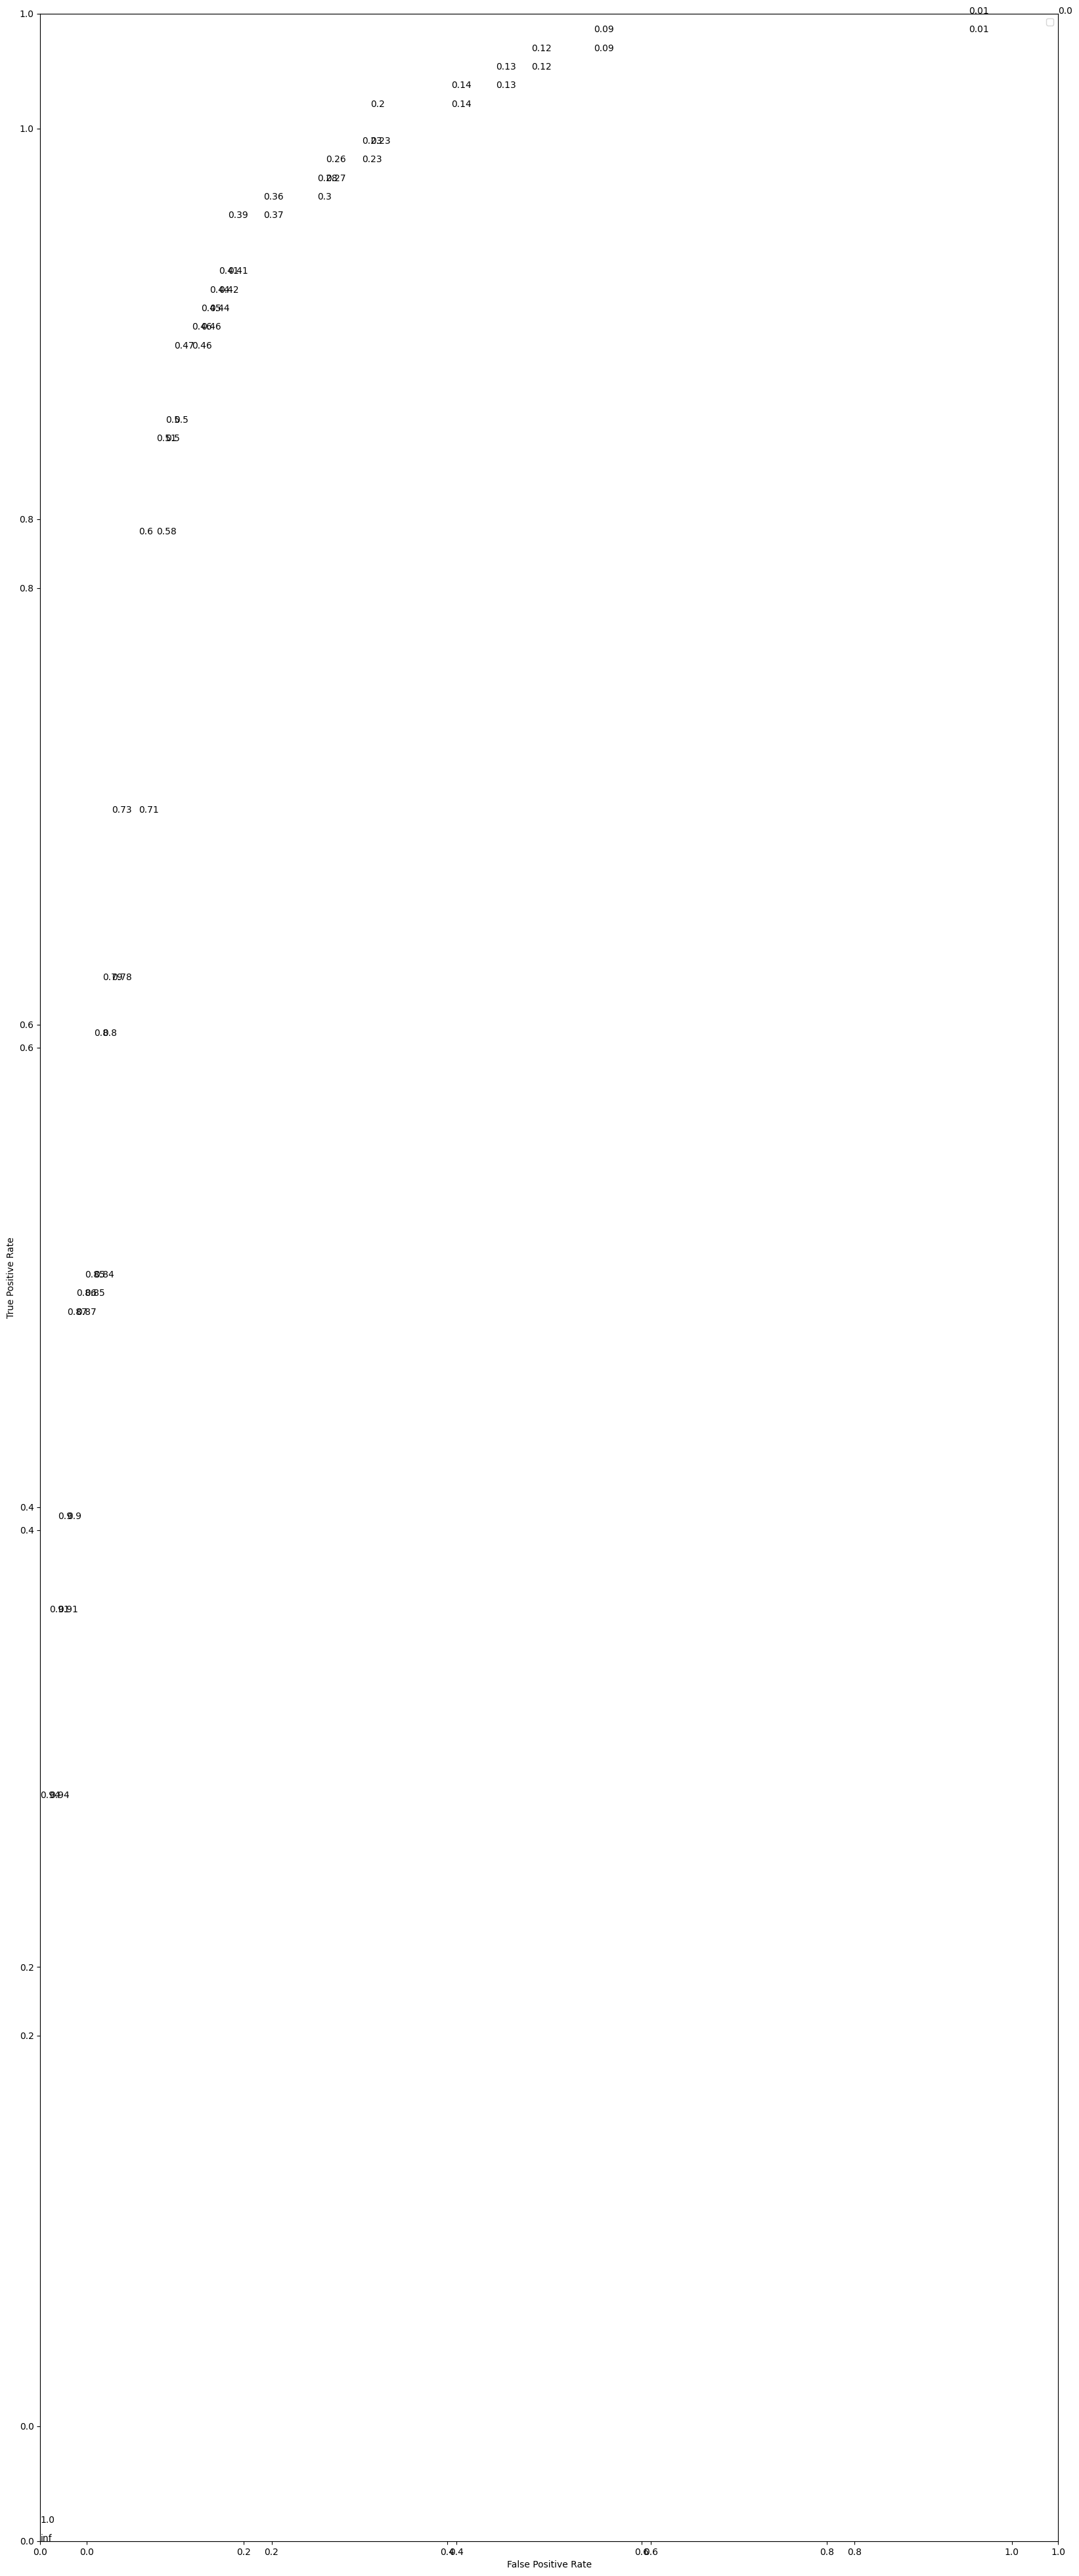

In [122]:
# plot the roc curve for the model
import numpy as np
import matplotlib.pyplot as pyplot
%matplotlib inline
fig = pyplot.figure(figsize=(20,50))
pyplot.plot(dummy_fpr, dummy_tpr, linestyle='--', label='Dummy Model')
pyplot.plot(model_fpr, model_tpr, marker='.', label='Logistic')
ax = fig.add_subplot(111)
for xyz in zip(model_fpr, model_tpr,thresholds):   
    ax.annotate('%s' % np.round(xyz[2],2), xy=(xyz[0],xyz[1]))
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()